# **Galton's Height Data Linear Regression**

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# **Import Data**

In [5]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Francis%20Galton%20Regression%20Data.txt', delimiter= '\t')

In [6]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Calculate correlations on the numeric DataFrame
df_numeric.corr()

,Family,Father,Mother,Gender,Height,Kids
Family,1.000000,-0.957761,-0.185941,NaN,-0.292005,0.170607
Father,-0.957761,1.000000,0.073665,NaN,0.275355,-0.160023
Mother,-0.185941,0.073665,1.000000,NaN,0.201655,-0.020030
Gender,NaN,NaN,NaN,NaN,NaN,NaN
Height,-0.292005,0.275355,0.201655,NaN,1.000000,-0.126910
Kids,0.170607,-0.160023,-0.020030,NaN,-0.126910,1.000000


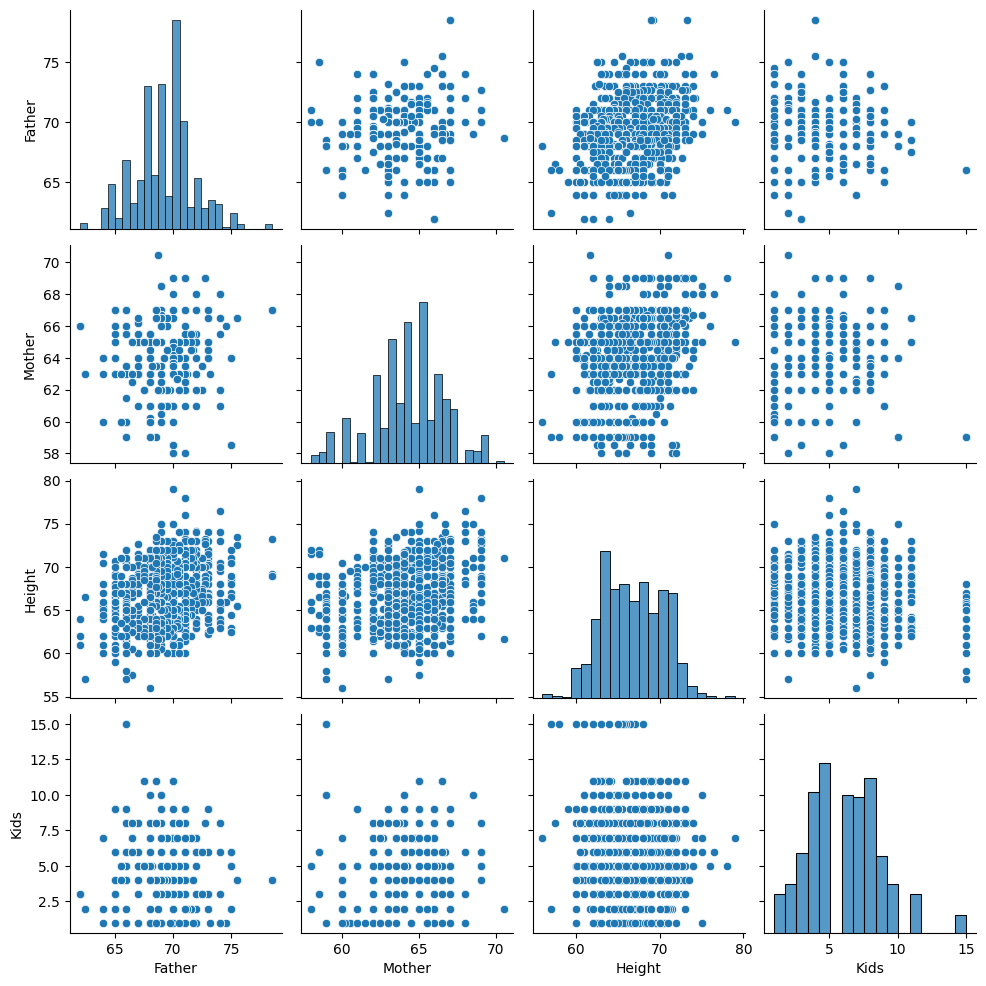

In [9]:
sns.pairplot(df)

In [10]:
y = df['Height']

In [11]:
X = df['Father']

In [12]:
slope = ((df['Father']-df['Father'].mean())*(df['Height']-df['Height'].mean())).sum()/((df['Father']-df['Father'].mean())**2).sum()

In [13]:
slope

0.3993812658985653

In [14]:
intercept = y.mean()-slope*X.mean()

In [15]:
intercept

39.110386837075396

In [16]:
X = df[['Father']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

39.11038683707541
[0.39938127]


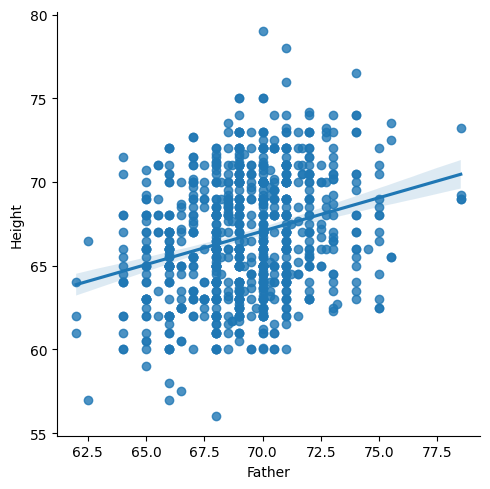

In [17]:
sns.lmplot(x = 'Father', y = 'Height', data = df)

<Axes: xlabel='Father', ylabel='Height'>

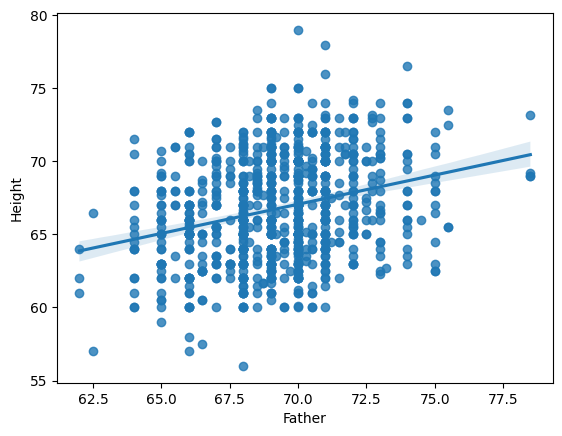

In [18]:
sns.regplot(x = 'Father', y = 'Height', data = df)

In [19]:
df['Gender'] = df['Gender'].replace({'M':0,'F':1})
X = df[['Gender', 'Father', 'Mother']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

20.570711329351845
[-5.22595131  0.40597803  0.32149514]


In [20]:
y_pred = lr.predict(X)

In [21]:
residual = y-y_pred

In [22]:
residual.shape, y.shape

((898,), (898,))

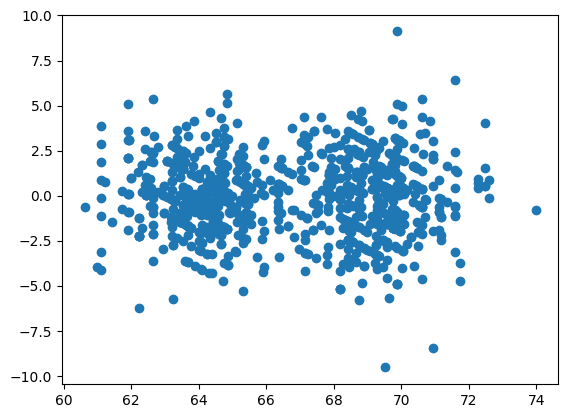

In [23]:
plt.scatter( x = y_pred, y = residual);

In [24]:
df.describe()

,Father,Mother,Gender,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,0.482183,66.760690,6.135857
std,2.470256,2.307025,0.499961,3.582918,2.685156
min,62.000000,58.000000,0.000000,56.000000,1.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000
50%,69.000000,64.000000,0.000000,66.500000,6.000000
75%,71.000000,65.500000,1.000000,69.700000,8.000000
max,78.500000,70.500000,1.000000,79.000000,15.000000


In [25]:
# Convert numeric columns to a suitable numeric type
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Gender':  # Assuming 'Gender' is your categorical column
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            print(f"Could not convert column {col} to numeric")

# Now calculate the mean
df.groupby(['Gender']).mean()

,Family,Father,Mother,Height,Kids
Gender,,,,,
0,106.182609,69.168172,64.005161,69.228817,5.972043
1,102.325581,69.302309,64.169515,64.110162,6.311778


In [26]:
69.2/64.11-1

0.07939479020433637

In [27]:
df.describe()

,Family,Father,Mother,Gender,Height,Kids
count,890.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,104.319101,69.232851,64.084410,0.482183,66.760690,6.135857
std,56.654314,2.470256,2.307025,0.499961,3.582918,2.685156
min,1.000000,62.000000,58.000000,0.000000,56.000000,1.000000
25%,58.000000,68.000000,63.000000,0.000000,64.000000,4.000000
50%,104.000000,69.000000,64.000000,0.000000,66.500000,6.000000
75%,155.000000,71.000000,65.500000,1.000000,69.700000,8.000000
max,204.000000,78.500000,70.500000,1.000000,79.000000,15.000000


In [28]:
69/64-1

0.078125

In [29]:
df.groupby(['Gender']).corr()

Family    Father    Mother    Height      Kids
Gender                                                         
0      Family  1.000000 -0.959693 -0.230397 -0.421936  0.102633
       Father -0.959693  1.000000  0.106335  0.391317 -0.091266
       Mother -0.230397  0.106335  1.000000  0.334131 -0.004485
       Height -0.421936  0.391317  0.334131  1.000000 -0.112378
       Kids    0.102633 -0.091266 -0.004485 -0.112378  1.000000
1      Family  1.000000 -0.957109 -0.138684 -0.487032  0.241879
       Father -0.957109  1.000000  0.041074  0.458761 -0.226864
       Mother -0.138684  0.041074  1.000000  0.313698 -0.041436
       Height -0.487032  0.458761  0.313698  1.000000 -0.122937
       Kids    0.241879 -0.226864 -0.041436 -0.122937  1.000000

In [30]:
X = np.array([2,4,6,8]).reshape(-1,1)
y = np.array([3,7,5,10])
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

1.5
[0.95]


-----------